# TikTok: What's trending and why?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stat


## Data Loading

In [ ]:
df1 = pd.read_csv('omnibuslaw_videos.csv')
df2 = pd.read_csv('tiktok_liked_videos.csv')
trend = pd.read_csv('trending.csv')
df4 = pd.read_csv('washingtonpost_videos.csv')


In [2]:
trend = pd.read_csv('trending.csv')

## Vizualização e manipulação dos Dados

In [3]:
trend.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays
0,virvirlogo,6850363964103787522,6870517816395599105,Jangan berbohong kalian kaum hawa #fypシ #foryo...,1599667090,17,https://www.tiktok.com/@virvirlogo/video/68705...,37300,190,299,430000
1,fighaaa,6710981038585250818,6881467654993988865,#jegalsampaigagal #mahasiswaindonesia #mahasis...,1602216546,34,https://www.tiktok.com/@fighaaa/video/68814676...,114900,789,1761,566900
2,cathyychang,6781377328532325377,6881237013593476353,thank you UPH🥺💖 #racunintiktok #tiktokindonesi...,1602162845,51,https://www.tiktok.com/@cathyychang/video/6881...,104200,1316,1039,576700
3,miraaa336,6515089076041940994,6874450585047878914,#duet dengan @yosattt #magicscan #AXISERUINAJA...,1600582758,9,https://www.tiktok.com/@miraaa336/video/687445...,1789,3,9,103800
4,pratiwi0421,6796618738764792834,6862641405672590594,learn from master @psdn_98 @naruto0919 #finger...,1597833226,13,https://www.tiktok.com/@pratiwi0421/video/6862...,2925,41,45,129600


In [4]:
trend.shape

(20, 11)

In [5]:
trend.describe()

,user_id,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,6.390061e+18,6.870148e+18,1.599581e+09,18.650000,34428.150000,948.250000,479.150000,3.703296e+05
std,1.507381e+18,9.821841e+15,2.286822e+06,14.492375,47635.546509,3165.130244,705.446799,5.735112e+05
min,7.417626e+10,6.852112e+18,1.595382e+09,7.000000,223.000000,0.000000,0.000000,4.092000e+03
25%,6.645310e+18,6.862150e+18,1.597719e+09,10.750000,1722.250000,5.250000,32.750000,8.122500e+04
50%,6.735814e+18,6.872464e+18,1.600120e+09,12.500000,13850.000000,85.500000,159.500000,1.952000e+05
75%,6.797080e+18,6.878190e+18,1.601454e+09,17.000000,37475.000000,373.250000,456.000000,4.262500e+05
max,6.861057e+18,6.881468e+18,1.602217e+09,59.000000,159700.000000,14300.000000,2453.000000,2.600000e+06


In [6]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     20 non-null     object
 1   user_id       20 non-null     int64 
 2   video_id      20 non-null     int64 
 3   video_desc    18 non-null     object
 4   video_time    20 non-null     int64 
 5   video_length  20 non-null     int64 
 6   video_link    20 non-null     object
 7   n_likes       20 non-null     int64 
 8   n_shares      20 non-null     int64 
 9   n_comments    20 non-null     int64 
 10  n_plays       20 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1.8+ KB


In [7]:
trend.head(2)

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays
0,virvirlogo,6850363964103787522,6870517816395599105,Jangan berbohong kalian kaum hawa #fypシ #foryo...,1599667090,17,https://www.tiktok.com/@virvirlogo/video/68705...,37300,190,299,430000
1,fighaaa,6710981038585250818,6881467654993988865,#jegalsampaigagal #mahasiswaindonesia #mahasis...,1602216546,34,https://www.tiktok.com/@fighaaa/video/68814676...,114900,789,1761,566900


In [8]:
 trend.columns


Index(['user_name', 'user_id', 'video_id', 'video_desc', 'video_time',
       'video_length', 'video_link', 'n_likes', 'n_shares', 'n_comments',
       'n_plays'],
      dtype='object')

In [9]:
trend1 = trend.drop(columns=['user_name','user_id','video_desc','video_link'])


In [10]:
trend1.head(3)

,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
0,6870517816395599105,1599667090,17,37300,190,299,430000
1,6881467654993988865,1602216546,34,114900,789,1761,566900
2,6881237013593476353,1602162845,51,104200,1316,1039,576700


In [11]:
trend1['n_likes'].min(), trend1['n_likes'].max()

(223, 159700)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


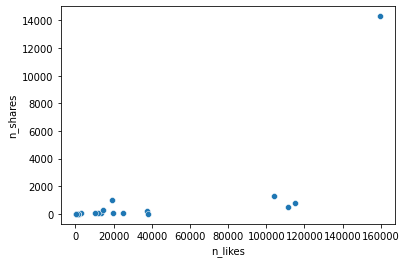

In [12]:
sns.scatterplot(trend1['n_likes'],trend1['n_shares']);

In [13]:
trend1.corr()

,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
video_id,1.000000,1.000000,0.362626,0.170681,-0.168003,0.212379,-0.111170
video_time,1.000000,1.000000,0.362626,0.170681,-0.168003,0.212379,-0.111169
video_length,0.362626,0.362626,1.000000,0.622712,-0.036458,0.684907,0.234271
n_likes,0.170681,0.170681,0.622712,1.000000,0.682840,0.896420,0.847266
n_shares,-0.168003,-0.168003,-0.036458,0.682840,1.000000,0.477223,0.941512
n_comments,0.212379,0.212379,0.684907,0.896420,0.477223,1.000000,0.674010
n_plays,-0.111170,-0.111169,0.234271,0.847266,0.941512,0.674010,1.000000


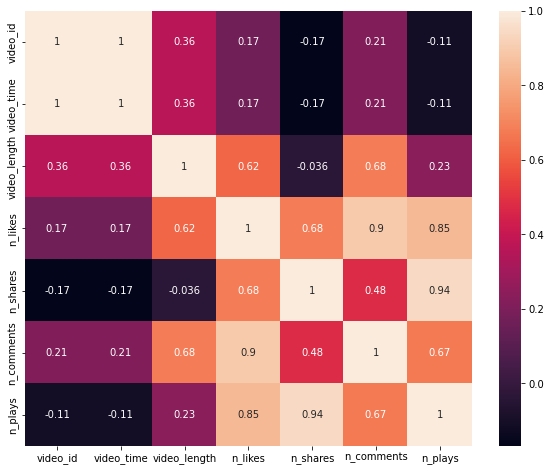

In [17]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(trend1.corr(), annot = True)


A partir do heatmap, podemos obter alguns insights, como: quanto maior o numero de plays maior o numero de shares e também quanto maior o numero de plays maior o numero de likes. Podemos dizer também que quanto mais curtido maior será o engajamento no video.

## Model Training

In [18]:
trend1.head()

,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
0,6870517816395599105,1599667090,17,37300,190,299,430000
1,6881467654993988865,1602216546,34,114900,789,1761,566900
2,6881237013593476353,1602162845,51,104200,1316,1039,576700
3,6874450585047878914,1600582758,9,1789,3,9,103800
4,6862641405672590594,1597833226,13,2925,41,45,129600


In [22]:
x = trend1.iloc[:, 0:6]
x

,video_id,video_time,video_length,n_likes,n_shares,n_comments
0,6870517816395599105,1599667090,17,37300,190,299
1,6881467654993988865,1602216546,34,114900,789,1761
2,6881237013593476353,1602162845,51,104200,1316,1039
3,6874450585047878914,1600582758,9,1789,3,9
4,6862641405672590594,1597833226,13,2925,41,45
5,6860140242016423170,1597250885,15,19800,108,176
6,6881452909809159425,1602213114,12,13200,84,386
7,6877532751755627778,1601300379,59,111300,521,2453
8,6868250249027226881,1599139130,17,38000,31,35
9,6874410426881363201,1600573411,35,24900,87,82


In [23]:
y = trend1.iloc[:, -1]
y

0      430000
1      566900
2      576700
3      103800
4      129600
5      361200
6      118800
7      848600
8      298200
9      370400
10      70200
11     260800
12      11100
13      13800
14      15600
15       4092
16     425000
17    2600000
18      84900
19     116900
Name: n_plays, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 1 )

In [26]:
x_train.shape

(16, 6)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[ 1.3078431 ,  1.30784349,  2.0156954 ,  1.2737978 ,  0.05833745,
         0.65480346],
       [ 0.85843903,  0.85843896, -0.86746143, -0.78980491, -0.32595182,
        -0.70305919],
       [-0.79226004, -0.79226034, -0.53221064, -0.76160768, -0.31426242,
        -0.67759088],
       [-0.7588883 , -0.75888661, -0.59926079,  2.38922613,  3.85271915,
         1.56630059],
       [ 0.88950067,  0.88949994,  2.55209667,  1.41649224, -0.17398953,
         2.55018132],
       [ 1.33389069,  1.33389143,  0.8758427 ,  1.48884434, -0.0956705 ,
         1.62259894],
       [ 0.87486553,  0.87486583, -0.59926079, -0.79511073, -0.32449065,
        -0.61727122],
       [ 0.09726586,  0.09726477, -0.26401   , -0.07074554, -0.27071937,
        -0.3371199 ],
       [-1.98135312, -1.98135597, -0.59926079, -0.52897556, -0.23155986,
        -0.07439425],
       [ 1.1866045 ,  1.18660396, -0.73336111, -0.61539613, -0.29643607,
        -0.14409697],
       [ 0.53687954,  0.5368804 ,  0.94289286, -0.

In [32]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled

array([[ 0.19749337,  0.19749318, -0.2773501 , -0.92531501, -0.63797341,
        -0.97602267],
       [-1.68734708, -1.68734704,  0.2773501 ,  1.35293708,  1.72679695,
         0.98394708],
       [ 0.78978295,  0.78978309,  1.38675049,  0.56782924, -0.44851109,
         1.0156447 ],
       [ 0.70007077,  0.70007076, -1.38675049, -0.99545131, -0.64031245,
        -1.02356911]])

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [44]:
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [45]:
pred = lr.predict(x_test_scaled)
pred

array([ 13800, 116900, 848600,  15600])

In [46]:
from sklearn.metrics import r2_score

-6.823121799114584